In [3]:
# Importing necessary packages: CSV for reading CSV files, DataFrames for working with data frames, and VegaLite for visualization.
using CSV, DataFrames, VegaLite

# Reading the CSV file "CT Pie_Full Data_data.csv" and storing it as a DataFrame named "df."
df = CSV.read("CT Pie_Full Data_data.csv", DataFrame)



Row,Police Action,District,N,Number of Records,Period,Station,Breach Type,Country,Alert Level,Area
,String15,String31,Int64,Int64,String15,String31,String,String15,Int64,String31
1,Prosecution,Canterbury,1,1,COVID-19,Hornby,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,New Zealand,2,Canterbury Metro Area
2,Written Warning,Auckland City,3,1,COVID-19,Auckland Central,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,New Zealand,2,Auckland Central Area
3,Written Warning,Canterbury,3,1,COVID-19,Hornby,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,New Zealand,2,Canterbury Metro Area
4,Prosecution,Canterbury,1,1,COVID-19,Hornby,Health Act Breach,New Zealand,2,Canterbury Metro Area
5,Prosecution,Wellington,1,1,COVID-19,Waitangirua,Health Act Breach,New Zealand,2,Kapiti-Mana Area
6,Verbal Warning,Auckland City,8,1,COVID-19,Auckland Central,Health Act Breach,New Zealand,2,Auckland Central Area
7,Verbal Warning,Auckland City,1,1,COVID-19,Mount Wellington,Health Act Breach,New Zealand,2,Auckland East Area
8,Verbal Warning,Counties/Manukau,2,1,COVID-19,Papakura,Health Act Breach,New Zealand,2,Counties Manukau South Area
9,Verbal Warning,Counties/Manukau,1,1,COVID-19,Auckland Airport,Health Act Breach,New Zealand,2,Counties Manukau West Area


In [4]:
# Checking for missing values in each column and create a DataFrame
missing_counts = DataFrame(
    column = names(df),  # Extracting column names
    missing_count = [sum(ismissing.(df[!, col])) for col in names(df)]  # Calculate the count of missing values per column
)



Row,column,missing_count
,String,Int64
1,Police Action,0
2,District,0
3,N,0
4,Number of Records,0
5,Period,0
6,Station,0
7,Breach Type,0
8,Country,0
9,Alert Level,0


In [5]:
# Finding duplicate rows by comparing all rows to the first row
duplicate_rows = [isequal(df[1, :], df[i, :]) for i in 2:size(df, 1)]

# Displaying the duplicate rows
if any(duplicate_rows)
    println("Duplicate Rows:")
    display(df[duplicate_rows, :])
else
    println("No duplicate rows found.")
end

No duplicate rows found.


In [6]:
# Grouping the data by 'District' and 'Breach Type'
grouped_data = groupby(df, [:District, Symbol("Breach Type")])

# This code groups the DataFrame 'df' by the columns 'District' and 'Breach Type'.
# It creates a new DataFrame 'grouped_data' that contains groups of data based on these two columns.


Row,Police Action,District,N,Number of Records,Period,Station,Breach Type,Country,Alert Level,Area
,String15,String31,Int64,Int64,String15,String31,String,String15,Int64,String31
1,Prosecution,Canterbury,1,1,COVID-19,Hornby,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,New Zealand,2,Canterbury Metro Area
2,Written Warning,Canterbury,3,1,COVID-19,Hornby,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,New Zealand,2,Canterbury Metro Area
Row,Police Action,District,N,Number of Records,Period,Station,Breach Type,Country,Alert Level,Area
,String15,String31,Int64,Int64,String15,String31,String,String15,Int64,String31
1,Prosecution,Southern,1,1,COVID-19,Invercargill Central,CDEM Breach,New Zealand,4,Southland Area
2,Prosecution,Southern,1,1,COVID-19,Te Anau,CDEM Breach,New Zealand,4,Southland Area
3,Verbal Warning,Southern,1,1,COVID-19,Balclutha,CDEM Breach,New Zealand,4,Otago Coastal Area
4,Verbal Warning,Southern,2,1,COVID-19,Riversdale,CDEM Breach,New Zealand,4,Southland Area
5,Verbal Warning,Southern,2,1,COVID-19,Te Anau,CDEM Breach,New Zealand,4,Southland Area


In [7]:
# Counting the number of occurrences for each breach type in each region
count_by_region_and_type = combine(grouped_data, nrow => :Count)

# This code takes the 'grouped_data' DataFrame and uses the 'combine' function to count the number of rows in each group.
# The result is stored in a new DataFrame called 'count_by_region_and_type' with a column named 'Count'.


Row,District,Breach Type,Count
,String31,String,Int64
1,Canterbury,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,2
2,Canterbury,Health Act Breach,78
3,Canterbury,CDEM Breach,3
4,Auckland City,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,1
5,Auckland City,Health Act Breach,54
6,Auckland City,CDEM Breach,10
7,Wellington,Health Act Breach,77
8,Wellington,CDEM Breach,26
9,Counties/Manukau,Health Act Breach,81


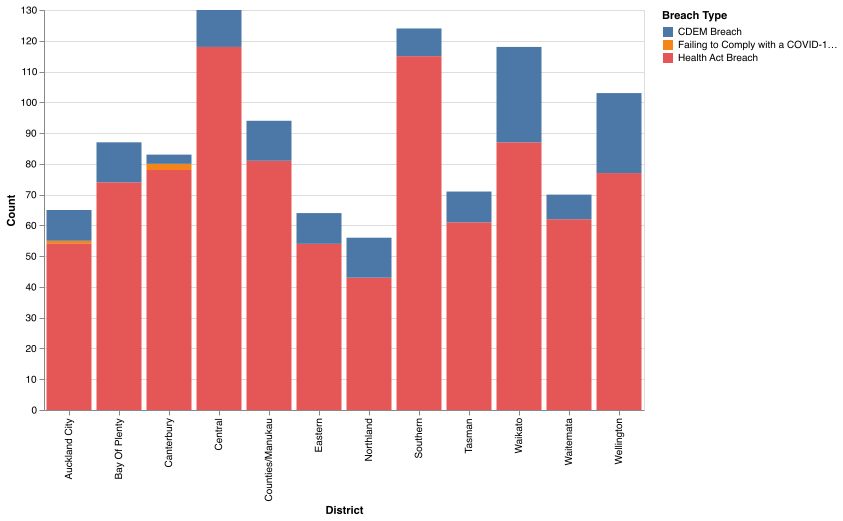

In [13]:
# Creating a stacked bar chart using Vega-Lite
count_by_region_and_type |>
  @vlplot(
    :bar,  # Use the bar mark type
    width = 600,  # Setting the width of the plot to 600 pixels
    height = 400,  # Setting the height of the plot to 400 pixels
    x = :District,  # Using the 'District' column for the x-axis
    y = :Count,  # Using the 'Count' column for the y-axis
    color = Symbol("Breach Type"),  # Using the 'Breach Type' column for color encoding
    stack = :Count  # Stacking the bars based on the 'Count' column
    
  )

# This code creates a stacked bar chart using Vega-Lite to visualize the count of breach types in each region.
# It specifies the width, height, data columns for the x-axis, y-axis, color, and stacking.


In [26]:
# Grouping the data by 'Breach Type' and count the occurrences of each type
breach_type_counts = combine(groupby(df, Symbol("Breach Type")), nrow => :Count)

# This code groups the data by the 'Breach Type' column and calculates the count of each type, storing the result in 'breach_type_counts.'


Row,Breach Type,Count
,String,Int64
1,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,3
2,Health Act Breach,904
3,CDEM Breach,158


In [27]:
# Grouping the data by 'Police Action' and count the occurrences of each action
Police_action_counts = combine(groupby(df, Symbol("Police Action")), nrow => :Count)

# This code groups the data by the 'Police Action' column and calculates the count of each action, storing the result in 'Police_action_counts.'


Row,Police Action,Count
,String15,Int64
1,Prosecution,239
2,Written Warning,384
3,Verbal Warning,331
4,Youth Referral,111


In [ ]:
##using Pkg
##Pkg.update("VegaLite")

In [28]:
# Grouping the data by 'Police Action' and 'Breach Type'
grouped_data1 = groupby(df, Cols([:("Police Action"), ("Breach Type")]))

# This code groups the data by the 'Police Action' and 'Breach Type' columns, creating a grouped DataFrame named 'grouped_data1.'


Row,Police Action,District,N,Number of Records,Period,Station,Breach Type,Country,Alert Level,Area
,String15,String31,Int64,Int64,String15,String31,String,String15,Int64,String31
1,Prosecution,Canterbury,1,1,COVID-19,Hornby,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,New Zealand,2,Canterbury Metro Area
Row,Police Action,District,N,Number of Records,Period,Station,Breach Type,Country,Alert Level,Area
,String15,String31,Int64,Int64,String15,String31,String,String15,Int64,String31
1,Youth Referral,Counties/Manukau,1,1,COVID-19,Papakura,CDEM Breach,New Zealand,3,Counties Manukau South Area
2,Youth Referral,Eastern,5,1,COVID-19,Gisborne,CDEM Breach,New Zealand,4,Tairawhiti Area
3,Youth Referral,Northland,4,1,COVID-19,Whangarei,CDEM Breach,New Zealand,4,Whangarei Area
4,Youth Referral,Southern,1,1,COVID-19,Invercargill Central,CDEM Breach,New Zealand,4,Southland Area
5,Youth Referral,Tasman,1,1,COVID-19,Takaka,CDEM Breach,New Zealand,4,Nelson Bays Area
6,Youth Referral,Tasman,3,1,COVID-19,Greymouth,CDEM Breach,New Zealand,4,West Coast Area


In [29]:
# Counting the number of occurrences for each combination of 'Police Action' and 'Breach Type'
count_by_breach_type_and_police_action = combine(grouped_data1, nrow => :Count)

# This code counts the number of occurrences for each unique combination of 'Police Action' and 'Breach Type' within the grouped data.
# The result is stored in a new DataFrame 'count_by_breach_type_and_police_action' with a 'Count' column.


Row,Police Action,Breach Type,Count
,String15,String,Int64
1,Prosecution,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,1
2,Prosecution,Health Act Breach,218
3,Prosecution,CDEM Breach,20
4,Written Warning,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,2
5,Written Warning,Health Act Breach,342
6,Written Warning,CDEM Breach,40
7,Verbal Warning,Health Act Breach,242
8,Verbal Warning,CDEM Breach,89
9,Youth Referral,Health Act Breach,102


In [15]:
# Renaming the columns to avoid Argument string error
count_by_breach_type_and_police_action_renamed=rename!(count_by_breach_type_and_police_action, [Symbol("Police Action") => :Police_Action, Symbol("Breach Type") => :Breach_Type])
count_by_breach_type_and_police_action_renamed


Row,Police_Action,Breach_Type,Count
,String15,String,Int64
1,Prosecution,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,1
2,Prosecution,Health Act Breach,218
3,Prosecution,CDEM Breach,20
4,Written Warning,Failing to Comply with a COVID-19 Direction/Prohibition/Restriction,2
5,Written Warning,Health Act Breach,342
6,Written Warning,CDEM Breach,40
7,Verbal Warning,Health Act Breach,242
8,Verbal Warning,CDEM Breach,89
9,Youth Referral,Health Act Breach,102


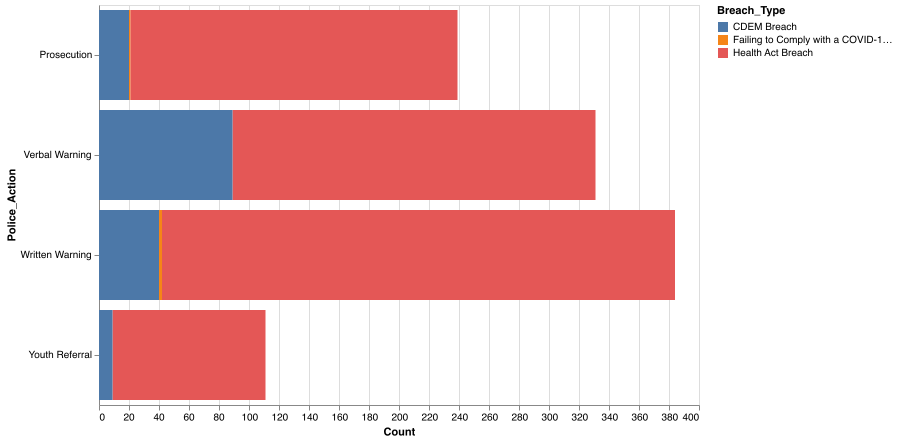

In [38]:
# The DataFrame 'count_by_breach_type_and_police_action_renamed' is used for creating the bar chart.

count_by_breach_type_and_police_action_renamed |>
  @vlplot(
    :bar,                 # Using the bar mark for the chart
    width = 600,          # Setting the width of the chart to 600 pixels
    height = 400,         # Setting the height of the chart to 400 pixels
    x = "Count",          # Using the 'Count' column for the x-axis
    y = :Police_Action,   # Mapping the 'Police_Action' column to the y-axis
    color = :Breach_Type  # Color-coding the bars based on the 'Breach_Type'
  )

# This code creates a horizontal bar chart using VegaLite. It visualizes the relationship between 'Count,' 'Police_Action,' and 'Breach_Type' in the DataFrame.
